# Assignment 1

## Guidelines

> Remember that this is a code notebook - add an explanation of what you do using text boxes and markdown, and comment your code.
>
> If you re-use a substantial portion of code you find online, e.g on Stackoverflow, you need to add a link to it and make the borrowing explicit. The same applies of you take it and modify it, even substantially. There is nothing bad in doing that, providing you are acknowledging it and make it clear you know what you're doing. Similarly, if you make use of generative language models (e.g. ChatGPT) to draft your answer, you must acknowledge this and include the prompts used to obtain that output. Again, your answer should be sufficiently commented and described to show that you understand your code.
>
> Make sure your notebooks have been run when you submit, as I won't run them myself. Submit both the `.ipynb` file along with an `.html` export of the same. Submit all necessary auxilliary files as well. Please compress your submission into a `.zip` archive. Only `.zip` files can be submitted.
> If you are using Google Colab, here is a tutorial for obtaining an HTML export: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab .
>
> With Jupyter, you can simply export it as HTML through the File menu.

## Grading policy
> As follows:
>
> * 70 points for correctly completing the assignment.
>
> * 20 points for appropriately writing and organizing your code in terms of structure, readibility (also by humans), comments and minimal documentation. It is important to be concise but also to explain what you did and why, when not obvious. Feel free to re-use functions and variables from previous questions if that helps for structure and readability - you do not need to repeat previous steps for each question.
> 
> * 10 points for doing something extra, e.g., if you go beyond expectations (overall or on something specific). Some ideas for extras might be mentioned in the exercises, or you can come up with your own. You don't need to do them all to get the bonus. The sum of points is 90, doing (some of) the extras can bring you to 100, so the extras are not necessary to get an A.
> 

**The AUC code of conduct applies to this assignment: please only submit your own work and follow the instructions on referencing external sources above.**

---

# Warm up (20 points)

## Question 1 (2 points)

Explain why `list1` and `list2` behave differently when they are passed to the `append_to_nested_list()` function.

In [32]:
def append_to_nested_list(a_list):
    a_list[0].append("Python")
    return a_list
    
list1 = [[], [], []]
list2 = [[]] * 3

print(append_to_nested_list(list1))
print(append_to_nested_list(list2))

[['Python'], [], []]
[['Python'], ['Python'], ['Python']]


list1 creates a list that contains three separate empty list and each inner list has its own reference in memory, whereas list2 creates three inner list that point to the same object in memory. Hence, that is why we see list1 returns with one Python recorded in one of the inner list, whereas list2 has Python in all of the inner lists

## Question 2 (2 points)

Write a function that counts the total frequency of words that start and end with the same character (e.g. comic) in a text file and test it on `data/melville-md.txt`. 

Ensure that the words are treated case-insensitive.

In [42]:
import re

def count_words_start_end_same_char(file_path):
    # Read the text from the file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text.lower())

    # Count the frequency of words starting and ending with the same character
    word_frequency = {}
    for word in words:
        if len(word) >= 2 and word[0] == word[-1]:
            word_frequency[word] = word_frequency.get(word, 0) + 1

    return word_frequency

# Test the function on 'data/melville-md.txt'
file_path = 'data/melville-md.txt'
result = count_words_start_end_same_char(file_path)

# Display the results
#for word, frequency in result.items():
    #print(f"{word}: {frequency} occurrences")


## Question 3 (2 points)

Rewrite the following code such that:

- the sequence of fruit names are randomly presented (without replacement). Use a function in the [random](https://docs.python.org/3.7/library/random.html) module for this.


- the article "an" is used when a fruit name begins with a vowel.

In [43]:
import random

available_fruit = ['apple', 'apricot', 'avocado', 'banana', 'bilberry', 'blackberry', 'blackcurrant', 'blueberry', 'boysenberry', 'currant', 'cherry', 'cherimoya', 'cloudberry', 'coconut', 'cranberry', 'cucumber', 'damson', 'date', 'dragonfruit', 'durian', 'elderberry', 'feijoa', 'fig', 'gooseberry', 'grape', 'raisin', 'grapefruit', 'guava', 'honeyberry', 'huckleberry', 'jabuticaba', 'jackfruit', 'jambul', 'jujube', 'kiwano', 'kiwifruit', 'kumquat', 'lemon', 'lime', 'loquat', 'longan', 'lychee', 'mango', 'mangosteen', 'marionberry', 'melon', 'cantaloupe', 'honeydew', 'watermelon', 'mulberry', 'nectarine', 'nance', 'orange', 'clementine', 'mandarine', 'tangerine', 'papaya', 'passionfruit', 'peach', 'pear', 'persimmon', 'physalis', 'plantain', 'plum', 'prune', 'pineapple', 'plumcot', 'pomegranate', 'pomelo', 'quince', 'raspberry', 'salmonberry', 'rambutan', 'redcurrant', 'salak', 'satsuma', 'soursop', 'strawberry', 'tamarillo', 'tamarind', 'yuzu']

random.shuffle(available_fruit)

#for fruit in available_fruit:
    #article = 'an' if fruit[0].lower() in {'a', 'e', 'i', 'o', 'u'} else 'a'
    #print("We have a " + fruit)

## Question 4 (5 points)

The following code has been written to extract all word-initial consonant clusters in a text (e.g. "br" in "bread). Each sequence is obtained by matching any sequence of letters that does not include 'aeiou' and that occurs after a whitespace or the start of the line and that consists of 2 or more such characters.

It works by reading an input file line by line, and finding all matches of a regular expression in this line (case insensitive).

Unfortunately, the method only counts, and we do not find out which word-initial consonants are present in the text. Can you find a way to save all matching consonant clusters to the dictionary named "consonantclusters" with their frequency as the value, and then print this dictionary? Note that there can be multiple results per line. Try to avoid capturing the space(s) before the consonant cluster also.

Solutions where you adapt the provided regular expression will get more points than non-regex solutions, but you can try a non-regex solution if you are stuck.

**Possible extra:** Print the consonant clusters sorted by frequency and in a nice looking way.

In [25]:
import codecs
import re

In [36]:
import codecs
import re

consonantclusters = {}
consonantclustercount = 0
with codecs.open("data/melville-md.txt", "r", encoding="utf8") as infile:
    consonantclusterregex = re.compile(r'(^|\s)(?:(?![aeiouy])[a-z]){2,}')
    for line in infile:
        result = consonantclusterregex.findall(line.lower())
        if result:
            consonantclustercount += len(result)
            for cluster in result:
                consonantclusters[cluster] = consonantclusters.get(cluster, 0) + 1
print(consonantclustercount)

51523


In [41]:
#code here

Total word-initial consonant clusters count: 51523
Consonant Clusters and Frequencies:
 : 47026
: 4497


## Question 5 (9 points)

Please use the frequencies in `late_arrival_causes` to create a duplicate of the plot below, as close as possible. This is called a Pareto chart.

Note: the line plot above the bars shows the cumulative frequency.

**Possible extra:** suggest, motivate and implement an alternative visualization for the same data.

![pareto chart](images/pareto-chart.png)

In [ ]:
late_arrival_causes = {"Child Care" : 44, "Emergency" : 7, "Overslept" : 11, "Traffic" : 56, "Transp." : 27, "Weather" : 20}

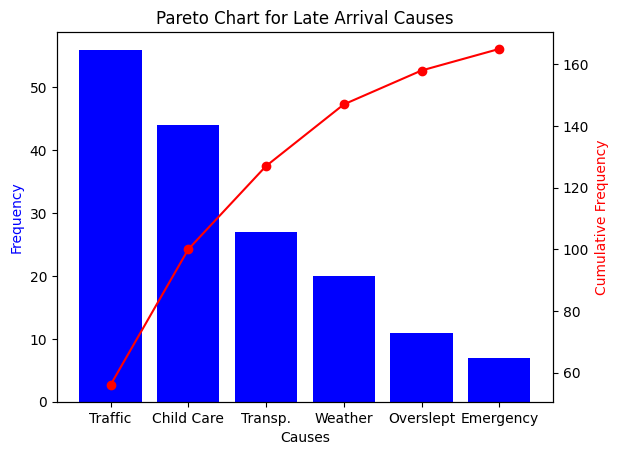

In [2]:
import matplotlib.pyplot as plt

late_arrival_causes = {"Child Care": 44, "Emergency": 7, "Overslept": 11, "Traffic": 56, "Transp.": 27, "Weather": 20}

# Sort the causes by frequency in descending order
sorted_causes = sorted(late_arrival_causes.items(), key=lambda x: x[1], reverse=True)

# Calculate cumulative frequencies
cumulative_frequencies = [sorted_causes[0][1]]
for cause, frequency in sorted_causes[1:]:
    cumulative_frequencies.append(cumulative_frequencies[-1] + frequency)

# Plot the Pareto chart
fig, ax1 = plt.subplots()

# Bar plot for frequencies
ax1.bar([cause[0] for cause in sorted_causes], [cause[1] for cause in sorted_causes], color='b')

# Line plot for cumulative frequencies
ax2 = ax1.twinx()
ax2.plot([cause[0] for cause in sorted_causes], cumulative_frequencies, color='r', marker='o')

# Set labels and title
ax1.set_xlabel('Causes')
ax1.set_ylabel('Frequency', color='b')
ax2.set_ylabel('Cumulative Frequency', color='r')
plt.title('Pareto Chart for Late Arrival Causes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()


---

# Preprocessing pipelines (30 points)

## Question 6 (20 points)

- Download a 19th-century edition (or earlier, but not later!) of a book you like from the [Internet Archive](https://archive.org) in `.txt` format. For example, [Frankenstein](https://archive.org/details/ghostseer01schiuoft/page/n6). Add the link to the edition you used to your answer, as well as the `.txt` file to your submission.

- Write code that:

    1. Reads the text in memory.
    
    1. Pre-processes the text with a tokenizer from [NLTK](https://www.nltk.org/api/nltk.tokenize.html) (remember to motivate your choice of tokenizer) and optionally other preprocessing steps if you feel this helps.
    
    1. Filter out words that consist of strictly less than 4 alphabetic characters.

    1. Counts the frequencies of all the words in the corpus (words should be counted case-insensitive).

    1. Writes each word-frequency pair to a csv file (from most frequent to rarest).

*Briefly* comment on your results, especially looking at very frequent and very infrequent words. What is problematic about processing these old editions? Can you find some limitations of the tokenizer in use, and think about how you would improve on it? Naturally, this part is required for full points.

**Possible extra:** plot the relative frequency of the top N words (e.g., use the Pareto chart you did above, or another suitable plot) and discuss whether the distribution might follow the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

**Possible extra:** add lemmatization or stemming and part-of-speech tagging.

In [ ]:
# your code here

## Question 7 (10 points)

Do some self-learning: implement the same pipeline of question 6 using [spaCy pipelines](https://spacy.io/usage/processing-pipelines).

Hint: Make sure to know what Spacy does by default when loading specific models, the defaults are not always what you need.

In [ ]:
# your code here

---

# Descriptive text analysis (20 points)

## Question 8 (20 points)

In the `data/numan` directory, there are lyrics of some songs from two albums by electronic music pioneer Gary Numan. There are 5 songs from his 1979 album and 5 songs from his 2017 album.  This data was acquired from [Genius](https://genius.com) (Genius Lyrics) using their API, something that you could do too using the lyricsgenius package for Python!

- Load the data from these files into an appropriate data structure and perform appropriate preprocessing. 

*Hint: This might be a good opportunity to show how good you were at writing re-usable code in the previous questions.*

- Write a function that can return some statistics about an albums' song lyrics, and run this function for both albums:

    * Most frequent words
    * Type to token ratio (unique words/words)
    * Average word length
    * Longest and shortests songs (by lyrics)
    * What are the songs with the largest vocabulary and smallest vocabulary?
    
- Print these results to your notebook for both albums in a nice looking way. Then, also show these same statistics for just the song 'Cars' from the 1979 album, which was Gary Numan's most famous song.
   
   * Write down your interpretation of these results in this notebook.  
   * In which of the two time periods was Gary Numan more verbose? Back it with some evidence.
   * Electronic music is sometimes said to make more use of repetition than other forms of music. In which of the two time periods did Gary Numan make more use of lyrical repetition? You can either argue your case based on the numbers you were asked to calculate, or you can come up with your own definition of 'repetitiveness' and calculate it with Python code.

In [ ]:
# your code here